# Homework 2

a)

In [1]:
import pandas as pd
df = pd.read_excel(open('../data/CCPP/Folds5x2_pp.xlsx', 'rb'), sheet_name = 'Sheet1')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


(b) i.

In [2]:
print('There are', len(df.index), 'rows and', len(df.columns), 'columns in the data set.')
print('The rows represents 9568 data points collected from a Combined Cycle Power Plant over 6 years, when the power plant was set to work with full load.')
print('The columns represents features consist of hourly average ambient variables Temperature (AT),  Exhaust Vacuum (V), Ambient Pressure (AP) and Relative Humidity (RH) to predict the net hourly electrical energy output (PE) of the plant.')

There are 9568 rows and 5 columns in the data set.
The rows represents 9568 data points collected from a Combined Cycle Power Plant over 6 years, when the power plant was set to work with full load.
The columns represents features consist of hourly average ambient variables Temperature (AT),  Exhaust Vacuum (V), Ambient Pressure (AP) and Relative Humidity (RH) to predict the net hourly electrical energy output (PE) of the plant.


(b) ii.

Accoding to the pairwise scatterplots, independent variables AT and V are loosely correlated, which could be the explanation for why both AT and V seems to be correlated to dependent variable PE.


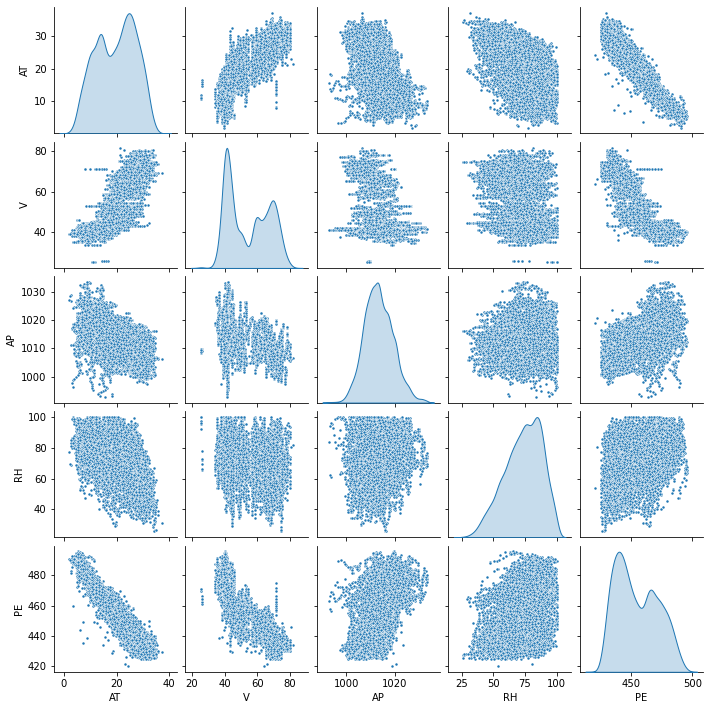

In [3]:
import seaborn as sns
sns.pairplot(df, vars = ['AT', 'V', 'AP', 'RH', 'PE'], diag_kind = 'kde', markers = '.', height = 2);
print('Accoding to the pairwise scatterplots, independent variables AT and V are loosely correlated, which could be the explanation for why both AT and V seems to be correlated to dependent variable PE.');

(b) iii.

In [4]:
desc = df.describe()
desc

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [5]:
mean = desc.to_numpy()[1].tolist()
median = desc.to_numpy()[5].tolist()
q1 = desc.to_numpy()[4].tolist()
q3 = desc.to_numpy()[6].tolist()

# calculate range & interquartile range
total_range = []
iqr = []
for i in range(len(desc.columns)):
    total_range.append(desc.to_numpy()[7,i] - desc.to_numpy()[3,i])
    iqr.append(desc.to_numpy()[6,i] - desc.to_numpy()[4,i])

# construct table
row_list = [mean, median, total_range, q1, q3, iqr]
desc_table = pd.DataFrame(row_list, columns = df.columns,
                          index = ['mean', 'median', 'range', 'Q1', 'Q3', 'IQR'])
desc_table

,AT,V,AP,RH,PE
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
median,20.345000,52.080000,1012.940000,74.975000,451.550000
range,35.300000,56.200000,40.410000,74.600000,75.500000
Q1,13.510000,41.740000,1009.100000,63.327500,439.750000
Q3,25.720000,66.540000,1017.260000,84.830000,468.430000
IQR,12.210000,24.800000,8.160000,21.502500,28.680000


(c)

In [6]:
import statsmodels.api as sm
import numpy as np

# set PE as response
y = df.iloc[:,4]

# for some reason i=0 won't work in the first run, couldn't figure out why. this is my workaround:
x0 = df.iloc[:,0]
x = sm.add_constant(x0.to_numpy())
m = sm.OLS(y, x).fit()
# end of workaround

# record coeffs for each predictor in simple model - part (d)
coeff_uni = []

# fit linear regression models and print model summary
for i in range(4):
    x0 = df.iloc[:,i]
    x = sm.add_constant(x0.to_numpy())
    m = sm.OLS(y, x).fit()
    coeff_uni.append(m.params[1])
    print('Summary of the linear regression model when using', df.columns[i], 'as single predictor:')
    print(m.summary(),'\n')

Summary of the linear regression model when using AT as single predictor:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:34:30   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [7]:
range(4)

range(0, 4)

In [8]:
# calculating correlation matrix and plot heatmap
corr = df.corr()
corr.style.background_gradient(cmap = 'RdYlBu')

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [9]:
print('According to the model summaries and correlation heatmap, models using AT or V as predictors has a statistically signifcant association between the predictor and the response. The heatmap also suggests correlation between AT and V.')

According to the model summaries and correlation heatmap, models using AT or V as predictors has a statistically signifcant association between the predictor and the response. The heatmap also suggests correlation between AT and V.


In [10]:
# looking for outliers by comparing range & IQR calculated in (b)
lower_bound = []
upper_bound = []
for i in range(len(desc.columns)):
    lower_bound.append(q1[i] -(1.5 * iqr[i]))
    upper_bound.append(q3[i] +(1.5 * iqr[i]))

df_min = desc.to_numpy()[3].tolist()
df_max = desc.to_numpy()[7].tolist()

row_list = [lower_bound, df_min, df_max, upper_bound, ]
outlier_table = pd.DataFrame(row_list, columns = df.columns,
                          index = ['lower bound', 'min', 'max', 'upper bound'])
outlier_table

,AT,V,AP,RH,PE
lower bound,-4.805,4.54,996.86,31.07375,396.73
min,1.810,25.36,992.89,25.56000,420.26
max,37.110,81.56,1033.30,100.16000,495.76
upper bound,44.035,103.74,1029.50,117.08375,511.45


In [11]:
print('By observing the table above, we can see there are outliers in predictor AP and RH that falls outside of 1.5 times the IQR above Q3 or below Q1.')

By observing the table above, we can see there are outliers in predictor AP and RH that falls outside of 1.5 times the IQR above Q3 or below Q1.


In [12]:
# removing outliers in AP and remodel
df1 = df.copy()
df1_filtered = df1[(df1['AP'] >= lower_bound[2]) & (df1['AP'] <= upper_bound[2])]
y1 = df1_filtered.iloc[:,4]
x0_ap = df1_filtered.iloc[:,2]
x_ap = sm.add_constant(x0_ap.to_numpy())
m = sm.OLS(y1, x_ap).fit()
print(m.summary())
print('\n','Removing outliers in AP slightly improved the model, but the association between AP and PE is still not significantly.')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     3532.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:34:31   Log-Likelihood:                -38829.
No. Observations:                9480   AIC:                         7.766e+04
Df Residuals:                    9478   BIC:                         7.768e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1122.8175     26.535    -42.314      0.0

In [13]:
# removing outliers in RH and remodel
df2 = df.copy()
df2_filtered = df2[(df2['RH'] >= lower_bound[3]) & (df2['RH'] <= upper_bound[3])]
y2 = df2_filtered.iloc[:,4]
x0_rh = df2_filtered.iloc[:,3]
x_rh = sm.add_constant(x0_rh.to_numpy())
m = sm.OLS(y2, x_rh).fit()
print(m.summary())
print('\n','Removing outliers in RH did not improve the model.')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     1705.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:34:31   Log-Likelihood:                -39882.
No. Observations:                9556   AIC:                         7.977e+04
Df Residuals:                    9554   BIC:                         7.978e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.8440      0.828    508.317      0.0

(d)

In [14]:
# fit model with all predictors
y = df.PE
X0 = df.drop(['PE'], axis = 1)
X = sm.add_constant(X0.to_numpy())
M = sm.OLS(y, X).fit()
print(M.summary(),'\n')
print(M.pvalues)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:34:31   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

In [15]:
print('Although all predictors have small p-values, AT has the smallest p-value = 0. We can reject the null hypothesis for AT.')

Although all predictors have small p-values, AT has the smallest p-value = 0. We can reject the null hypothesis for AT.


(e)

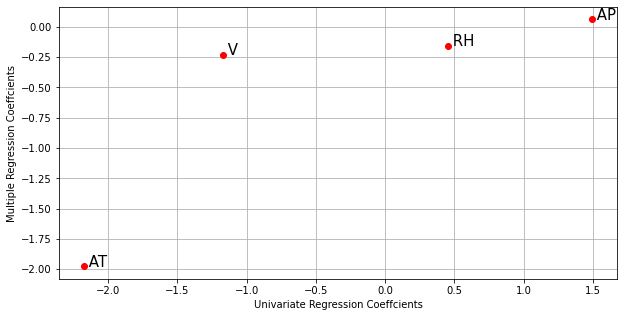

In [16]:
import matplotlib.pyplot as plt

coeff_multi = [j for i,j in enumerate(M.params)]
coeff_multi.pop(0)

plt.figure(figsize = (10,5))
plt.plot(coeff_uni, coeff_multi, 'or')
plt.xlabel('Univariate Regression Coeffcients')
plt.ylabel('Multiple Regression Coeffcients')
plt.annotate(' AT', (coeff_uni[0], coeff_multi[0]), fontsize = 15)
plt.annotate(' V', (coeff_uni[1], coeff_multi[1]), fontsize = 15)
plt.annotate(' AP', (coeff_uni[2], coeff_multi[2]), fontsize = 15)
plt.annotate(' RH', (coeff_uni[3], coeff_multi[3]), fontsize = 15)
plt.grid()
plt.show()

(f)

In [17]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree = 3)
X_poly = pf.fit_transform(X)
M_poly = sm.OLS(y, X_poly).fit()
M_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     4586.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:34:31   Log-Likelihood:                -27203.
No. Observations:                9568   AIC:                         5.447e+04
Df Residuals:                    9534   BIC:                         5.472e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0772      0.246      0.314      0.753      -0.404       0.559
x1             0.0772      0.246      0.314      0.753      -0.404       0.559
x2            11.2789    117.364      0.096      0.923    -218.780     241.338
x3          -179.3724     72.952     -2.459      0.014    -322.373     -36.372
x4             5.8699      3.525      1.665      0.096      -1.039      12.779
x5           -13.9478     34.434     -0.405      0.685     -81.445      53.550
x6             0.0772      0.246      0.314      0.753      -0.404       0.559
x7            11.2788    117.364      0.096      0.923    -218.780     241.338
x8          -179.3724     72.952     -2.459      0.014    -322.373     -36.371
x9             5.8699      3.525      1.665      0.096      -1.039      12.779
x10          -13.9478     34.434     -0.405      0.685     -81.445      53.550
x11           -0.5629      0.324     -1.739      0.082      -1.197       0.072
x12            0.4929      0.322      1.528      0.126      -0.139       1.125
x13           -0.0673      0.344     -0.196      0.845      -0.741       0.607
x14            0.3724      0.152      2.449      0.014       0.074       0.670
x15            0.4734      0.100      4.743      0.000       0.278       0.669
x16            0.4809      0.213      2.254      0.024       0.063       0.899
x17           -0.1711      0.074     -2.313      0.021      -0.316      -0.026
x18           -0.0145      0.010     -1.410      0.159      -0.035       0.006
x19            0.0221      0.100      0.221      0.825      -0.174       0.218
x20            0.1654      0.030      5.593      0.000       0.107       0.223
x21            0.0772      0.246      0.314      0.753      -0.404       0.559
x22           11.2788    117.364      0.096      0.923    -218.780     241.338
x23         -179.3724     72.952     -2.459      0.014    -322.373     -36.371
x24            5.8699      3.525      1.665      0.096      -1.039      12.779
x25          -13.9478     34.434     -0.405      0.685     -81.445      53.550
x26           -0.5629      0.324     -1.739      0.082      -1.197       0.072
x27            0.4929      0.322      1.528      0.126      -0.139       1.125
x28           -0.0673      0.344     -0.196      0.845      -0.741       0.607
x29            0.3724      0.152      2.449      0.014       0.074       0.670
x30            0.4734      0.100      4.743      0.000       0.278       0.669
x31            0.4809      0.213      2.254      0.024       0.063       0.899
x32           -0.1711      0.074     -2.313      0.021      -0.316      -0.026
x33           -0.0145      0.010     -1.410      0.159      -0.035       0.006
x34            0.0221      0.100      0.221      0.825      -0.174       0.218
x35            0.1654      0.030      5.593      0.000       0.107       0.223
x3

In [18]:
print('R-squared improved from 0.929 to 0.941, indicating non-linear association')

R-squared improved from 0.929 to 0.941, indicating non-linear association


(g)

In [19]:
pf = PolynomialFeatures(interaction_only = True)
X_intera = pf.fit_transform(X)
M_intera = sm.OLS(y, X_intera).fit()
M_intera.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:34:31   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        342.8912     39.320      8.721      0.000     265.816     419.967
x1           342.8912     39.320      8.721      0.000     265.816     419.967
x2            -2.1735      1.187     -1.832      0.067      -4.499       0.152
x3            -3.8374      0.675     -5.682      0.000      -5.161      -2.514
x4            -0.0762      0.038     -1.983      0.047      -0.151      -0.001
x5             0.7855      0.387      2.031      0.042       0.027       1.543
x6            -2.1735      1.187     -1.832      0.067      -4.499       0.152
x7            -3.8374      0.675     -5.682      0.000      -5.161      -2.514
x8            -0.0762      0.038     -1.983      0.047      -0.151      -0.001
x9             0.7855      0.387      2.031      0.042       0.027       1.543
x10            0.0210      0.001     23.338      0.000       0.019       0.023
x11            0.0018      0.002      0.752      0.452      -0.003       0.006
x12           -0.0052      0.001     -6.444      0.000      -0.007      -0.004
x13            0.0068      0.001      5.135      0.000       0.004       0.009
x14            0.0008      0.000      1.716      0.086      -0.000       0.002
x15           -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     2.40e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.51e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [20]:
print('R-squared improved from 0.929 to 0.936, indicating interactions of predictors')

R-squared improved from 0.929 to 0.936, indicating interactions of predictors


(h)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
y = df.PE
X0 = df.drop(['PE'], axis = 1)
X = sm.add_constant(X0.to_numpy())
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)

In [22]:
# model 1: modeling with all predictors
m1 = sm.OLS(y_train, X_train).fit()
e_train1 = mean_squared_error(m1.predict(X_train), y_train)
e_test1 = mean_squared_error(m1.predict(X_test), y_test)

In [23]:
# model 2: modeling with all predictors + all pairwise predictors + quadratic predictors
pf = PolynomialFeatures(degree = 4)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.transform(X_test)

m2 = sm.OLS(y_train, X_train_poly).fit()
e_train2 = mean_squared_error(m2.predict(X_train_poly), y_train)
e_test2 = mean_squared_error(m2.predict(X_test_poly), y_test)

In [24]:
# model 3: modeling with pruned feature set
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
#from sklearn.feature_selection import SelectFromModel
#from sklearn.linear_model import LinearRegression

selector = SelectKBest(f_regression, k = 100).fit(X_train_poly, y_train) # k=100 is arbitrary
X_train_pruned = selector.transform(X_train_poly)
X_test_pruned = selector.transform(X_test_poly)

#selector = SelectFromModel(estimator=LinearRegression()).fit(X_train_poly, y_train)
#X_train_pruned = selector.transform(X_train_poly)
#X_test_pruned = selector.transform(X_test_poly)

m3 = sm.OLS(y_train, X_train_pruned).fit()
e_train3 = mean_squared_error(m3.predict(X_train_pruned), y_train)
e_test3 = mean_squared_error(m3.predict(X_test_pruned), y_test)

D:\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
D:\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


In [25]:
data = [(e_train1, e_train2, e_train3), (e_test1, e_test2, e_test3)]
model_compare = pd.DataFrame(data, index = ['Train MSE', 'Test MSE'], columns = ['Model 1','Model 2','Model 3'])
model_compare

,Model 1,Model 2,Model 3
Train MSE,20.941564,16.928322,17.100237
Test MSE,20.368383,16.298483,16.433230


(i)

The best k with raw features is 5 , with test MSE of 15.6635051689307
The best k with normalized features is 11 , with test MSE of 17.735888739777376


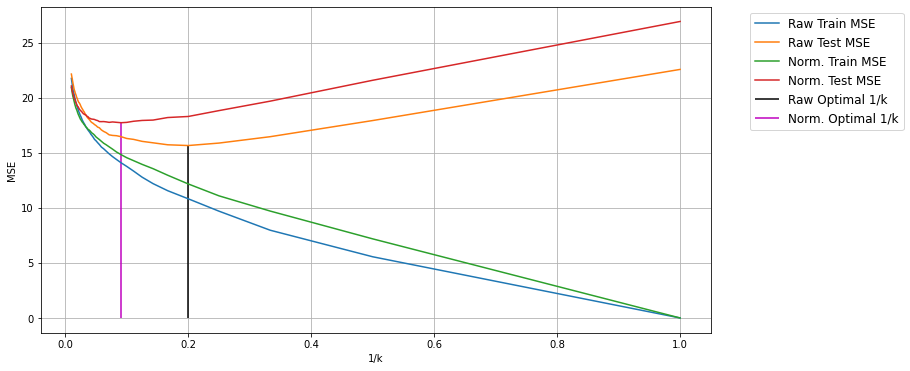

In [26]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor

normalizer = preprocessing.Normalizer()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

params = np.arange(1, 101, 1)
knn1 = KNeighborsRegressor()
knn2 = KNeighborsRegressor()
train_errors_raw = list()
test_errors_raw = list()
train_errors_norm = list()
test_errors_norm = list()

for k in params:
    knn1.set_params(n_neighbors = k)
    knn1.fit(X_train, y_train)
    train_errors_raw.append(mean_squared_error(knn1.predict(X_train), y_train))
    test_errors_raw.append(mean_squared_error(knn1.predict(X_test), y_test))
    
    knn2.set_params(n_neighbors = k)
    knn2.fit(X_train_norm, y_train)
    train_errors_norm.append(mean_squared_error(knn2.predict(X_train_norm), y_train))
    test_errors_norm.append(mean_squared_error(knn2.predict(X_test_norm), y_test))

param_reciprocal = 1/params
opt_k_raw = param_reciprocal[test_errors_raw.index(np.min(test_errors_raw))]
opt_k_norm = param_reciprocal[test_errors_norm.index(np.min(test_errors_norm))]

plt.figure(figsize = (12,6))
plt.plot(param_reciprocal, train_errors_raw)
plt.plot(param_reciprocal, test_errors_raw)
plt.plot(param_reciprocal, train_errors_norm)
plt.plot(param_reciprocal, test_errors_norm)
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.vlines(opt_k_raw, 0, np.min(test_errors_raw), color = 'k')
plt.vlines(opt_k_norm, 0, np.min(test_errors_norm), color = 'm')
plt.legend(['Raw Train MSE', 'Raw Test MSE', 'Norm. Train MSE', 'Norm. Test MSE', 'Raw Optimal 1/k', 'Norm. Optimal 1/k'],
           fontsize = 'large', bbox_to_anchor=(1.05, 1))
plt.draw()
plt.grid()

print('The best k with raw features is', params[test_errors_raw.index(np.min(test_errors_raw))],
      ', with test MSE of', np.min(test_errors_raw))
print('The best k with normalized features is', params[test_errors_norm.index(np.min(test_errors_norm))],
      ', with test MSE of', np.min(test_errors_norm))

(j)

In [27]:
data = [(e_train1, e_train2, e_train3, np.min(train_errors_raw), np.min(train_errors_norm)),
        (e_test1, e_test2, e_test3, np.min(test_errors_raw), np.min(test_errors_norm))]
model_compare = pd.DataFrame(data, index = ['Train MSE', 'Test MSE'],
                             columns = ['Model 1','Model 2','Model 3','KNN Raw','KNN Norm.'])
model_compare

,Model 1,Model 2,Model 3,KNN Raw,KNN Norm.
Train MSE,20.941564,16.928322,17.100237,0.000000,0.000000
Test MSE,20.368383,16.298483,16.433230,15.663505,17.735889


In [28]:
print('KNN with raw features has the best test error. possibly due to the flexibility of KNN being a non-parametric model.')

KNN with raw features has the best test error. possibly due to the flexibility of KNN being a non-parametric model.


ISLR: 2.4.1

a) flexible method is better. flexible method can capture more intricate relationships in the large sample size, and the risk of overfitting is relatively low due to the small p<br>
b) inflexible method is better. flexible method would have high risk of overfitting.<br>
c) flexible method is better. flexible method can capture more intricate relationships especially when they are non-linear.<br>
d) inflexible method is better. flexible method would have high risk of overfitting due to the high variance.<br>

ISLR: 2.4.7

In [29]:
x1 = [0,2,0,0,-1,1]
x2 = [3,0,1,1,0,1]
x3 = [0,0,3,2,1,1]
x0 = 0

(a)

In [30]:
import math 
dist = []
for i in range(6):
    dist.append(math.sqrt((x1[i]-x0)**2 + (x2[i]-x0)**2 + (x3[i]-x0)**2))
dist

[3.0,
 2.0,
 3.1622776601683795,
 2.23606797749979,
 1.4142135623730951,
 1.7320508075688772]

(b) when k=1, nearest neighbor is observation #5 (1.4142135623730951) which is green. therefore the prediction when k=1 is green.

(c) when k=1, nearest neighbor is observation #5, #6 and #2. the majority of the observations are red, therefore the prediction when k=3 is red.

(d) we would expect the best k to be small. smaller k would make the model more flexible, thus fits better for non-linear decision boundaries.